In [108]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_hub as hub
import time
import pandas as pd


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [88]:
data_dir = 'C:\\Users\\ardo\\Documents\\semai\\dataset\\ripeness\\ripeness_v7.1'
print(data_dir)

C:\Users\ardo\Documents\semai\dataset\ripeness\ripeness_v7.1


In [89]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 593 files belonging to 4 classes.
Using 475 files for training.


In [90]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 593 files belonging to 4 classes.
Using 118 files for validation.


In [91]:
class_names = train_ds.class_names
print(class_names)

['belum matang', 'jankos', 'lewat matang', 'matang']


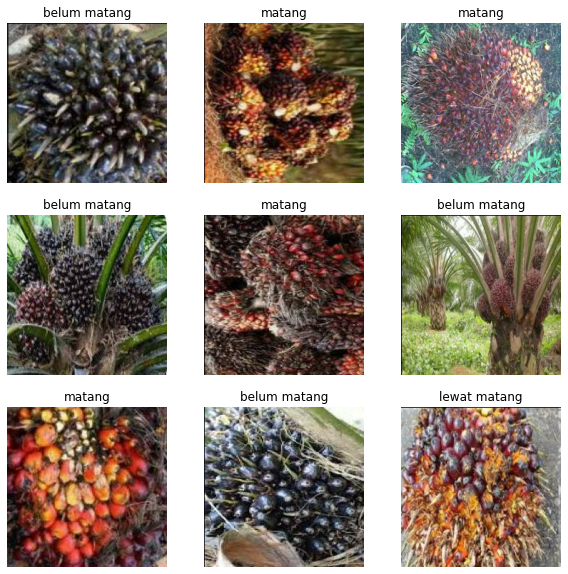

In [92]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [94]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [95]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [96]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

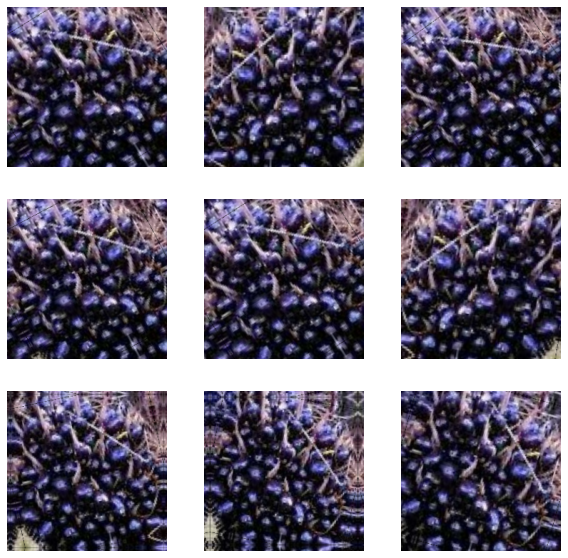

In [97]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [98]:
num_classes = 4

model = Sequential([
  data_augmentation,
  normalization_layer,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [99]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_11 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 56, 56, 64)      

In [101]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
15/15 [==============================] - 1s 94ms/step - loss: 1.7752 - accuracy: 0.4568 - val_loss: 0.9765 - val_accuracy: 0.7373
Epoch 2/50
15/15 [==============================] - 1s 86ms/step - loss: 0.8489 - accuracy: 0.6842 - val_loss: 0.6677 - val_accuracy: 0.7288
Epoch 3/50
15/15 [==============================] - 1s 86ms/step - loss: 0.6420 - accuracy: 0.7432 - val_loss: 0.6267 - val_accuracy: 0.7458
Epoch 4/50
15/15 [==============================] - 1s 86ms/step - loss: 0.5399 - accuracy: 0.7916 - val_loss: 0.5340 - val_accuracy: 0.8220
Epoch 5/50
15/15 [==============================] - 1s 86ms/step - loss: 0.5248 - accuracy: 0.8000 - val_loss: 0.4795 - val_accuracy: 0.7881
Epoch 6/50
15/15 [==============================] - 1s 88ms/step - loss: 0.4872 - accuracy: 0.8295 - val_loss: 0.5407 - val_accuracy: 0.7712
Epoch 7/50
15/15 [==============================] - 1s 87ms/step - loss: 0.4787 - accuracy: 0.8147 - val_loss: 0.4962 - val_accuracy: 0.7881
Epoch 8/50
15

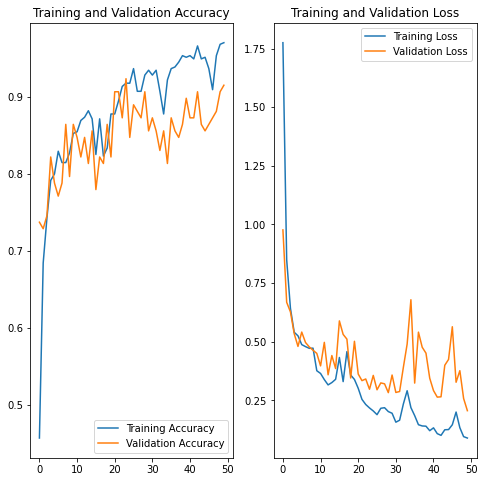

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [105]:
tandan_url = "https://akacn.ac.id/wp-content/uploads/2020/11/tandon-kosong-1.png"
tandan_path = tf.keras.utils.get_file('Red_sunflower', origin=tandan_url)

test_img = "C:\\Users\\ardo\\Documents\\semai\\dataset\\ripeness\\ripeness_v7.1\\belum matang\\1_JPG.rf.aad530f29306380c8f21aedbe334acfc.jpg"

img = keras.preprocessing.image.load_img(
    test_img, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(predictions)
print(class_names)
print(np.round(score, 3))

print(
    "This image most likely belongs to {} with a {:.1f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

[[36.204792   2.3569028 -9.588486  -0.8650764]]
['belum matang', 'jankos', 'lewat matang', 'matang']
[1. 0. 0. 0.]
This image most likely belongs to belum matang with a 100.0 percent confidence.


In [119]:
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(mobilenet_url,
                                   input_shape=(img_height, img_width, 3))

feature_extractor.trainable = False

In [131]:
num_classes = 4

model = Sequential([
  data_augmentation,
  normalization_layer,
  feature_extractor,
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_18 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_27 (Dense)             (None, 256)               327936    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)             

In [132]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
15/15 [==============================] - 2s 112ms/step - loss: 0.9811 - accuracy: 0.6211 - val_loss: 0.4745 - val_accuracy: 0.8051
Epoch 2/30
15/15 [==============================] - 1s 89ms/step - loss: 0.4509 - accuracy: 0.8358 - val_loss: 0.2747 - val_accuracy: 0.8983
Epoch 3/30
15/15 [==============================] - 1s 88ms/step - loss: 0.3217 - accuracy: 0.8863 - val_loss: 0.3031 - val_accuracy: 0.8729
Epoch 4/30
15/15 [==============================] - 1s 87ms/step - loss: 0.3264 - accuracy: 0.8821 - val_loss: 0.2397 - val_accuracy: 0.8814
Epoch 5/30
15/15 [==============================] - 1s 90ms/step - loss: 0.2300 - accuracy: 0.9095 - val_loss: 0.1867 - val_accuracy: 0.9153
Epoch 6/30
15/15 [==============================] - 1s 90ms/step - loss: 0.2539 - accuracy: 0.9011 - val_loss: 0.2006 - val_accuracy: 0.8898
Epoch 7/30
15/15 [==============================] - 1s 89ms/step - loss: 0.2254 - accuracy: 0.9389 - val_loss: 0.1818 - val_accuracy: 0.9237
Epoch 8/30
1

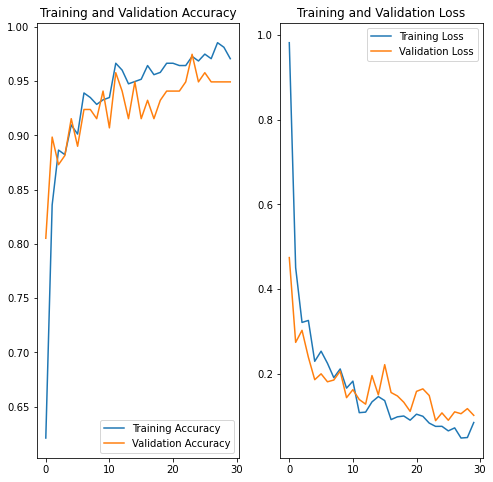

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

[[-6.0321703  1.6274331  5.727905  -2.4415243]]
['belum matang', 'jankos', 'lewat matang', 'matang']
[0.    0.016 0.983 0.   ]
This image most likely belongs to lewat matang with a 98.3 percent confidence.


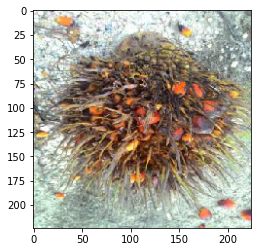

In [155]:
tandan_url = "https://docplayer.info/docs-images/70/62137124/images/31-0.jpg"
tandan_loc = "C:\\Users\\ardo\\Documents\\personal\\dev\\notebook\\test_ripe_0604\\tandan_lewat.jpg"
tandan_path = tf.keras.utils.get_file(tandan_loc, origin=tandan_url)

test_img = "C:\\Users\\ardo\\Documents\\semai\\dataset\\ripeness\\ripeness_v7.1\\belum matang\\4_jpg.rf.6da018ee5194f730fa76294e2ea00131.jpg"

img = keras.preprocessing.image.load_img(
    tandan_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(predictions)
print(class_names)
print(np.round(score, 3))

print(
    "This image most likely belongs to {} with a {:.1f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(img)

In [163]:
timename = time.strftime("%Y%m%d%H%M%S")
saved_model_path = "ripeness-" + timename + ".h5" # or you can simply use 'my_model.h5'
model.save(saved_model_path) #save your model

In [150]:
# to reload your model if no snippet keras layer e.g MobileNetV2
#model = keras.models.load_model(saved_model_path)

model = keras.models.load_model(saved_model_path, custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_18 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_27 (Dense)             (None, 256)               327936    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)             

In [204]:
# Get images and labels batch from validation dataset generator
val_image_batch, val_label_batch = next(iter(val_ds))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

# Get predictions for images batch
tf_model_predictions = model.predict(val_image_batch)
score = tf.nn.softmax(tf_model_predictions)
print("Prediction results shape:", score.shape)
score = np.round(score, 3)
# >> Prediction results shape: (32, 5)

# Convert prediction results to Pandas dataframe, for better visualization
tf_pred_dataframe = pd.DataFrame(score)
tf_pred_dataframe.columns = class_names

tf_pred_dataframe.head()


Validation batch shape: (32, 224, 224, 3)
Prediction results shape: (32, 4)


,belum matang,jankos,lewat matang,matang
0,0.001,0.0,0.025,0.974
1,0.810,0.0,0.000,0.190
2,1.000,0.0,0.000,0.000
3,0.000,1.0,0.000,0.000
4,0.000,0.0,0.997,0.003


['matang' 'belum matang' 'belum matang' 'jankos' 'lewat matang' 'matang'
 'jankos' 'matang' 'matang' 'matang' 'matang' 'belum matang' 'matang'
 'matang' 'belum matang' 'matang' 'matang' 'belum matang' 'matang'
 'matang' 'matang' 'belum matang' 'matang' 'matang' 'lewat matang'
 'lewat matang' 'belum matang' 'belum matang' 'jankos' 'matang'
 'belum matang' 'matang']
Labels:            [3 0 0 1 2 3 1 3 3 3 3 0 3 3 0 3 3 0 3 3 3 3 3 3 3 2 0 0 1 3 0 3]
Predicted labels:  [3 0 0 1 2 3 1 3 3 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 2 2 0 0 1 3 0 3]


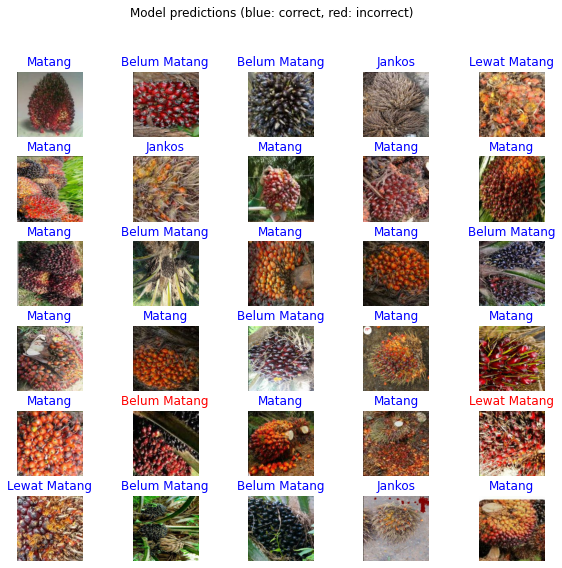

In [206]:
image_batch = val_image_batch.numpy()
label_batch = val_label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)

predicted_class_names = np.array(class_names)[predicted_ids]

print(predicted_class_names)
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n].astype('uint8'))
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [199]:
timename = time.strftime("%Y%m%d%H%M%S")
tflite_path = "ripeness-" + timename + ".tflite"
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(tflite_path, 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ardo\AppData\Local\Temp\tmpcwp5yozl\assets


INFO:tensorflow:Assets written to: C:\Users\ardo\AppData\Local\Temp\tmpcwp5yozl\assets


In [165]:
timename = time.strftime("%Y%m%d%H%M%S")
tflite_q_path = "ripeness-q-" + timename + ".tflite"
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_q_model = converter.convert()
with open(tflite_q_path, 'wb') as f:
  f.write(tflite_q_model)

INFO:tensorflow:Assets written to: C:\Users\ardo\AppData\Local\Temp\tmp95ymo4r2\assets


INFO:tensorflow:Assets written to: C:\Users\ardo\AppData\Local\Temp\tmp95ymo4r2\assets


In [202]:
tflite_interpreter = tf.lite.Interpreter(model_path=tflite_path)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])
print("\n== Output details ==")
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

print("\n\nAfter Conversion:\n\n")

tflite_interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("shape:", input_details[0]['shape'])
print("\n== Output details ==")
print("shape:", output_details[0]['shape'])

== Input details ==
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
shape: [1 4]
type: <class 'numpy.float32'>


After Conversion:


== Input details ==
shape: [ 32 224 224   3]

== Output details ==
shape: [32  4]


In [205]:
# Set batch of images into input tensor
tflite_interpreter.set_tensor(input_details[0]['index'], val_image_batch)
# Run inference
tflite_interpreter.invoke()
# Get prediction results
tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

# Convert prediction results to Pandas dataframe, for better visualization
tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
tflite_pred_dataframe.columns = class_names

tf_pred_dataframe.head()

Prediction results shape: (32, 4)


,belum matang,jankos,lewat matang,matang
0,0.001,0.0,0.025,0.974
1,0.810,0.0,0.000,0.190
2,1.000,0.0,0.000,0.000
3,0.000,1.0,0.000,0.000
4,0.000,0.0,0.997,0.003


In [207]:
tflite_interpreter = tf.lite.Interpreter(model_path=tflite_q_path)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])
print("\n== Output details ==")
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

print("\n\nAfter Conversion:\n\n")

tflite_interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("shape:", input_details[0]['shape'])
print("\n== Output details ==")
print("shape:", output_details[0]['shape'])

== Input details ==
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
shape: [1 4]
type: <class 'numpy.float32'>


After Conversion:


== Input details ==
shape: [ 32 224 224   3]

== Output details ==
shape: [32  4]


In [208]:
# Set batch of images into input tensor
tflite_interpreter.set_tensor(input_details[0]['index'], val_image_batch)
# Run inference
tflite_interpreter.invoke()
# Get prediction results
tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

# Convert prediction results to Pandas dataframe, for better visualization
tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
tflite_pred_dataframe.columns = class_names

tf_pred_dataframe.head()

Prediction results shape: (32, 4)


,belum matang,jankos,lewat matang,matang
0,0.001,0.0,0.025,0.974
1,0.810,0.0,0.000,0.190
2,1.000,0.0,0.000,0.000
3,0.000,1.0,0.000,0.000
4,0.000,0.0,0.997,0.003


In [209]:
def converttostr(input_seq, seperator):
   # Join all the strings in list
   final_str = seperator.join(input_seq)
   return final_str

labels = converttostr(class_names, '\n')
with open('labels.txt', 'w') as f:
    f.write(labels)